<a href="https://colab.research.google.com/github/AbhinavaReddy-hub/learning-DL-/blob/main/pytorch_DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

In [ ]:
weight =0.7
bias =0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight*X+bias
print(X[:10],len(X))
print(Y[:10],len(Y))


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 50
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) 50


In [ ]:
train_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

In [ ]:
  def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(fontsize=14)

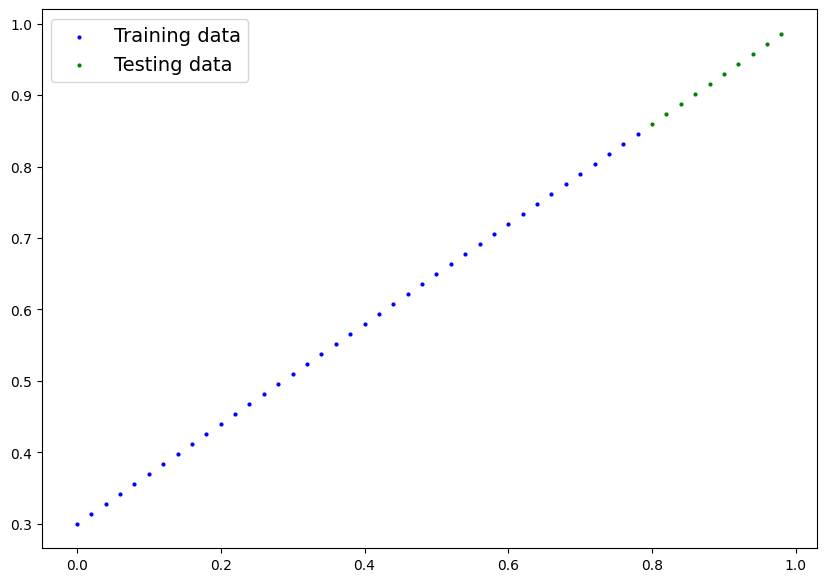

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights*x+self.bias


In [ ]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

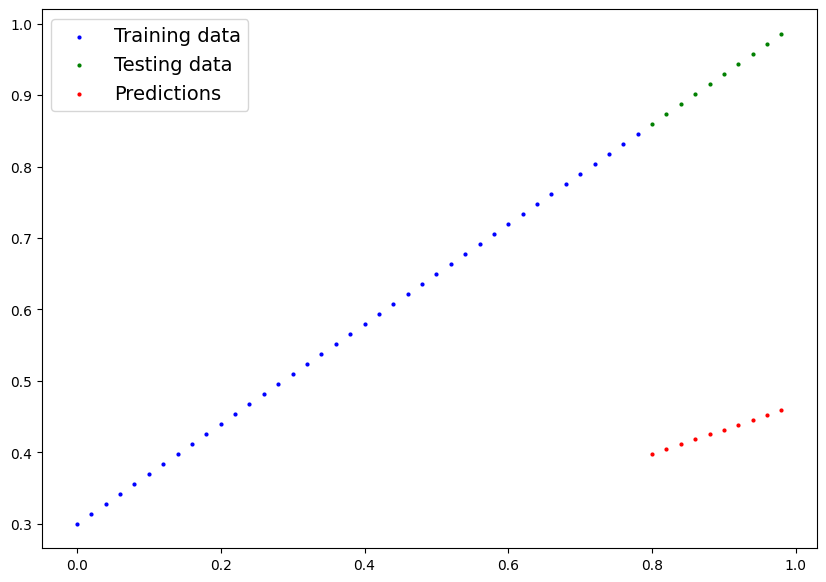

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)
plot_predictions(predictions=y_preds)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.001)

In [ ]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):

  model_0.train()
  y_pred=model_0(X_train)
  loss=loss_fn(y_pred,Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,Y_test)
    if epoch%10==0:
      print(f"Epoch:{epoch} loss:{loss} test_loss:{test_loss}")
model_0.state_dict()

Epoch:0 loss:0.19767141342163086 test_loss:0.35847947001457214
Epoch:10 loss:0.18615040183067322 test_loss:0.34500852227211
Epoch:20 loss:0.17462942004203796 test_loss:0.33153754472732544
Epoch:30 loss:0.16310855746269226 test_loss:0.3180667459964752
Epoch:40 loss:0.15158770978450775 test_loss:0.304595947265625
Epoch:50 loss:0.14006686210632324 test_loss:0.2911251187324524
Epoch:60 loss:0.12854602932929993 test_loss:0.2776543200016022
Epoch:70 loss:0.11702518165111542 test_loss:0.26418352127075195
Epoch:80 loss:0.10654274374246597 test_loss:0.251315176486969
Epoch:90 loss:0.09747617691755295 test_loss:0.2392154484987259


OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3250]))])

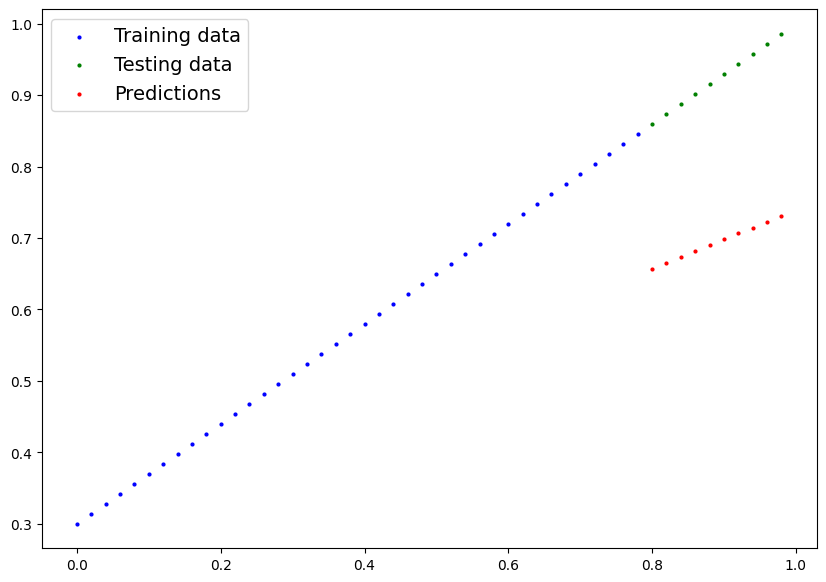

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)
plot_predictions(predictions=y_preds)